In [2]:
import pandas as pd
from glue import qglue
#%gui qt4

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import cm
import matplotlib

import numpy as np
import csv
import sys

import mpld3
from mpld3 import plugins, utils

%matplotlib inline

In [4]:
df=pd.read_csv("nsf_funding.csv")
df[1:-1]

,Institution,All_agencies,DOC,DOD,DOE,ED,EPA,HHS,NASA,NSF,USDA,Othera
1,Johns Hopkins U.,1538502.6,422.9,720039.7,4497.2,44.7,0.0,603533.9,158349.1,38368.8,0.0,13246.3
2,U. WA,662920.7,12242.1,64049.8,20339.0,4704.0,464.9,448690.5,10928.7,87701.2,10558.4,3242.0
3,U. MI,609859.1,3253.0,39861.5,20509.0,1971.0,1588.2,418803.4,21837.8,86482.8,1361.6,14190.7
4,"U. CA, San Francisco",573638.4,0.0,31425.6,163.9,919.7,0.0,536012.0,349.2,4767.9,0.0,0.0
5,"U. CA, San Diego",565551.1,17334.0,59290.0,13314.1,193.7,400.0,368753.9,7423.9,97723.3,559.8,558.2
6,U. PA,540124.2,1287.2,33779.3,6578.1,44.7,0.0,458366.4,2278.8,36586.5,1128.1,75.0
7,Stanford U.,495617.1,565.0,54587.0,12624.1,89.4,190.0,360829.7,17104.7,46070.6,82.8,3473.7
8,"U. CA, Los Angeles",481135.1,0.0,32489.2,19377.0,3148.6,0.0,348876.0,12701.7,64122.9,350.0,69.7
9,Columbia U. in the City of New York,477051.2,2028.1,24615.0,9503.1,582.0,500.0,346116.7,14971.9,77772.4,0.0,962.1
10,U. Pittsburgh,465624.9,99.5,20017.6,3274.0,2510.8,0.0,413395.7,321.1,25139.6,0.0,866.6


In [5]:
df[23:24]

,Institution,All_agencies,DOC,DOD,DOE,ED,EPA,HHS,NASA,NSF,USDA,Othera
23,MA Institute of Technology,339998.9,2608.5,95018.5,63061.4,0,923.9,94869.2,22316.4,58358.4,150,2692.5


In [6]:
df=df.replace(0, np.nan)

In [7]:
name=df['Institution'][1:-1].values
print name

['\xc2\xa0\xc2\xa0\xc2\xa0Johns Hopkins U.' '\xc2\xa0\xc2\xa0\xc2\xa0U. WA'
 '\xc2\xa0\xc2\xa0\xc2\xa0U. MI'
 '\xc2\xa0\xc2\xa0\xc2\xa0U. CA, San Francisco'
 '\xc2\xa0\xc2\xa0\xc2\xa0U. CA, San Diego' '\xc2\xa0\xc2\xa0\xc2\xa0U. PA'
 '\xc2\xa0\xc2\xa0\xc2\xa0Stanford U.'
 '\xc2\xa0\xc2\xa0\xc2\xa0U. CA, Los Angeles'
 '\xc2\xa0\xc2\xa0\xc2\xa0Columbia U. in the City of New York'
 '\xc2\xa0\xc2\xa0\xc2\xa0U. Pittsburgh'
 '\xc2\xa0\xc2\xa0\xc2\xa0Harvard U.' '\xc2\xa0\xc2\xa0\xc2\xa0Duke U.'
 '\xc2\xa0\xc2\xa0\xc2\xa0U. CO'
 '\xc2\xa0\xc2\xa0\xc2\xa0U. NC, Chapel Hill'
 '\xc2\xa0\xc2\xa0\xc2\xa0U. WI, Madison' '\xc2\xa0\xc2\xa0\xc2\xa0Yale U.'
 '\xc2\xa0\xc2\xa0\xc2\xa0U. MN' '\xc2\xa0\xc2\xa0\xc2\xa0PA State U.'
 '\xc2\xa0\xc2\xa0\xc2\xa0GA Institute of Technology'
 '\xc2\xa0\xc2\xa0\xc2\xa0Vanderbilt U.'
 '\xc2\xa0\xc2\xa0\xc2\xa0Washington U., St. Louis'
 '\xc2\xa0\xc2\xa0\xc2\xa0Cornell U.'
 '\xc2\xa0\xc2\xa0\xc2\xa0MA Institute of Technology'
 '\xc2\xa0\xc2\xa0\xc2\xa0U. CA, Davis'
 

In [9]:
class HelloWorld(mpld3.plugins.PluginBase):  # inherit from PluginBase
    """Hello World plugin"""
    
    JAVASCRIPT = """
    mpld3.register_plugin("helloworld", HelloWorld);
    HelloWorld.prototype = Object.create(mpld3.Plugin.prototype);
    HelloWorld.prototype.constructor = HelloWorld;
    function HelloWorld(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };
    
    HelloWorld.prototype.draw = function(){
        // FIXME: this is a very brittle way to select the y-axis element
        var ax_y = this.fig.axes[0].elements[1];

        // see https://github.com/mbostock/d3/wiki/Formatting#d3_format
        // for d3js formating documentation
        ax_y.axis.tickFormat(d3.format("d"));

        // TODO: use a function for tick values that
        // updates when values pan and zoom
        ax_y.axis.tickValues([1,100,1000,1e4,1e5]);

        // HACK: use reset to redraw figure
        this.fig.reset(); 
    }
    """
    def __init__(self):
        self.dict_ = {"type": "helloworld"}
        
class HighlightLines(plugins.PluginBase):
    """A plugin to highlight lines on hover"""

    JAVASCRIPT = """
    mpld3.register_plugin("linehighlight", LineHighlightPlugin);
    LineHighlightPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    LineHighlightPlugin.prototype.constructor = LineHighlightPlugin;
    LineHighlightPlugin.prototype.requiredProps = ["line_ids"];
    LineHighlightPlugin.prototype.defaultProps = {alpha_bg:0.3, alpha_fg:1.0}
    function LineHighlightPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    LineHighlightPlugin.prototype.draw = function(){
      for(var i=0; i<this.props.line_ids.length; i++){
         var obj = mpld3.get_element(this.props.line_ids[i], this.fig),
             alpha_fg = this.props.alpha_fg;
             alpha_bg = this.props.alpha_bg;
         obj.elements()
             .on("mouseover.highlight", function(d, i){
                            d3.select(this).transition().duration(50)
                              .style("stroke-opacity", alpha_fg); })
             .on("mouseout.highlight", function(d, i){
                            d3.select(this).transition().duration(200)
                              .style("stroke-opacity", alpha_bg); });
      }
    };
    """

    def __init__(self, lines):
        self.lines = lines
        self.dict_ = {"type": "linehighlight",
                      "line_ids": [utils.get_id(line) for line in lines],
                      "alpha_bg": lines[0].get_alpha(),
                      "alpha_fg": 1.0}


100 100


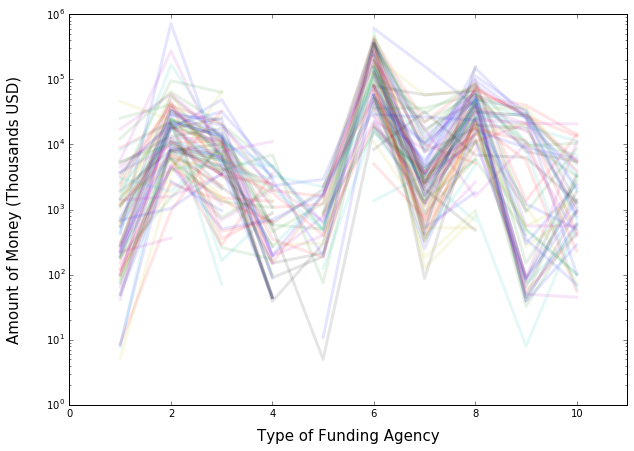

In [20]:
pylab.rcParams['figure.figsize'] = 10, 7
mpld3.enable_notebook()
#mpld3.disable_notebook()
x_num = [1,2,3,4,5,6,7,8,9,10]
x_label = ['DOC','DOD','DOE','ED','EPA','HHS','NASA','NSF','USDA','Others']

fig, ax = plt.subplots(1, 1)
#fig, ax = plt.subplots(subplot_kw={'xticks': []})#, 'yticks': []})

y=[]
for i in range(100):
    y.append(df[i+1:i+2][['DOC','DOD','DOE','ED','EPA','HHS','NASA','NSF','USDA','Othera']].values[0])


    
y=np.array(y)
lines=ax.plot(x_num, y.T, lw=3, alpha=0.1)


#ax.set_xticks(x_num)
#ax.set_xticklabels(x_label)
ax.set_yscale('log')
ax.set_ylabel('Amount of Money (Thousands USD)',size=15, labelpad=24)
ax.set_xlabel('Type of Funding Agency',size=15, labelpad=10)
ax.axis([0,11,1,1000000])
ax_fmt = HelloWorld()
mpld3.plugins.connect(fig, ax_fmt)

mpld3.plugins.connect(fig, HighlightLines(lines))

labels = list(name)
print len(y), len(name)
for i in range(len(y)):
    tooltip = mpld3.plugins.LineLabelTooltip(ax.get_lines()[i], labels[i])
    mpld3.plugins.connect(fig, tooltip)
    
x=mpld3.fig_to_html(fig,no_extras=False, template_type='general', figid=None, use_http=False)

In [445]:
text_file = open("funding.html", "w")
text_file.write("%s" % x)
text_file.close()